In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import random

from os import listdir, mkdir
from os.path import join, exists
import datetime

import matplotlib.pyplot as plt

import ee
import geemap

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from shapely.geometry import Point

import warnings

warnings.filterwarnings('ignore')

In [2]:
ee.Authenticate()
ee.Initialize()

In [3]:
url = '/Users/arpanganguli/Projects/GEOFIN/Data/DL_FIRE_M-C61_468674/fire_archive_M-C61_468674.csv'
df = pd.read_csv(url)
df2 = df[(df.confidence > 70) & (df.type == 0)]
url2 = '/Users/arpanganguli/Projects/GEOFIN/Data/DL_FIRE_M-C61_468674/fire_nrt_M-C61_468674.csv'
df2 = pd.read_csv(url2)
df2 = df2[(df2.confidence > 70)]
df = pd.concat([df[['latitude', 'longitude', 'acq_date']],
               df2[['latitude', 'longitude', 'acq_date']]])

<Axes: >

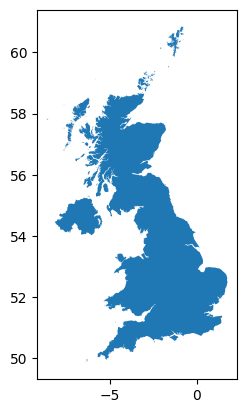

In [4]:
shapefile_path = '/Users/arpanganguli/Projects/GEOFIN/Resources/Shapefile/gadm41_GBR_0.shp'
shape = gpd.read_file(shapefile_path)
shape.plot()

In [5]:
print(df.head())

   latitude  longitude    acq_date
0   51.5737    -3.7713  2017-01-03
1   53.5677    -0.5949  2017-01-04
2   53.5687    -0.5946  2017-01-05
3   51.5732    -3.7776  2017-01-10
4   51.5712    -3.7632  2017-01-10


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4738 entries, 0 to 526
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   4738 non-null   float64
 1   longitude  4738 non-null   float64
 2   acq_date   4738 non-null   object 
dtypes: float64(2), object(1)
memory usage: 148.1+ KB
None


In [7]:
df['geometry'] = df.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
print(df.head())

   latitude  longitude    acq_date                 geometry
0   51.5737    -3.7713  2017-01-03  POINT (-3.7713 51.5737)
1   53.5677    -0.5949  2017-01-04  POINT (-0.5949 53.5677)
2   53.5687    -0.5946  2017-01-05  POINT (-0.5946 53.5687)
3   51.5732    -3.7776  2017-01-10  POINT (-3.7776 51.5732)
4   51.5712    -3.7632  2017-01-10  POINT (-3.7632 51.5712)


In [8]:
gdf = gpd.GeoDataFrame(df.reset_index(drop=True))
print(gdf.head())

   latitude  longitude    acq_date                   geometry
0   51.5737    -3.7713  2017-01-03  POINT (-3.77130 51.57370)
1   53.5677    -0.5949  2017-01-04  POINT (-0.59490 53.56770)
2   53.5687    -0.5946  2017-01-05  POINT (-0.59460 53.56870)
3   51.5732    -3.7776  2017-01-10  POINT (-3.77760 51.57320)
4   51.5712    -3.7632  2017-01-10  POINT (-3.76320 51.57120)


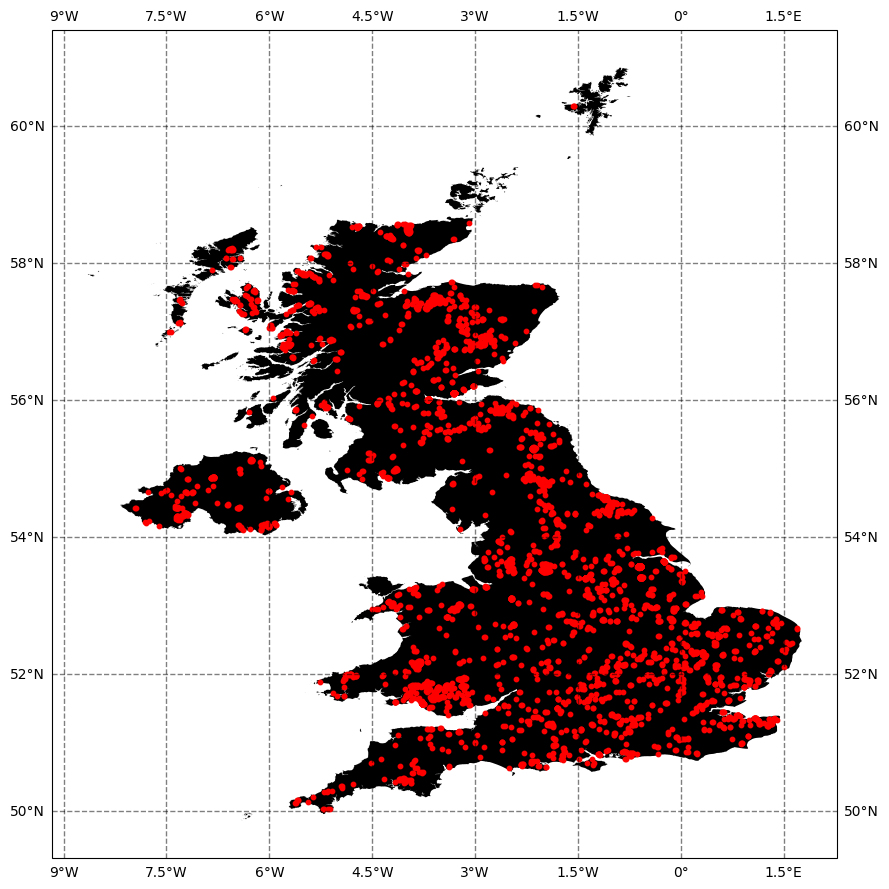

In [10]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(16, 9))

shape.geometry.plot(ax=ax, color='black')
gdf.geometry.plot(ax=ax, color='red', markersize=10)

ax.gridlines(draw_labels=True, linewidth=1, alpha=0.5, linestyle='--', color='black')

plt.tight_layout()
plt.show()

In [15]:
uk = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(
    ee.Filter.eq('ADM0_NAME', 'U.K. of Great Britain and Northern Ireland'))
SBands = ['B2', 'B3', 'B4', 'B11','B12', 'SCL', 'QA60']

In [17]:
points = []
for i in range(len(df)):
    points.append(ee.Geometry.Point([df.longitude.values[i], df.latitude.values[i]]))

In [18]:
print(df.head())

   latitude  longitude    acq_date                 geometry
0   51.5737    -3.7713  2017-01-03  POINT (-3.7713 51.5737)
1   53.5677    -0.5949  2017-01-04  POINT (-0.5949 53.5677)
2   53.5687    -0.5946  2017-01-05  POINT (-0.5946 53.5687)
3   51.5732    -3.7776  2017-01-10  POINT (-3.7776 51.5732)
4   51.5712    -3.7632  2017-01-10  POINT (-3.7632 51.5712)
